In [1]:
#本章需导入的模块
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from itertools import cycle
import warnings
warnings.filterwarnings(action = 'ignore')
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']  #解决中文显示乱码问题
plt.rcParams['axes.unicode_minus']=False
from scipy.stats.kde import gaussian_kde,multivariate_normal
from scipy.stats import norm
from sklearn.datasets import make_moons
from sklearn import decomposition
from sklearn.cluster import DBSCAN,Birch,KMeans,estimate_bandwidth,MeanShift

In [2]:
data=pd.read_csv("批发商数据.csv")
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


主成分系数 [[ 0.17371704 -0.394463   -0.45436364  0.17219603 -0.74551495 -0.1494356 ]
 [-0.68513571 -0.16239926 -0.06937908 -0.487691   -0.04191162 -0.50970874]]


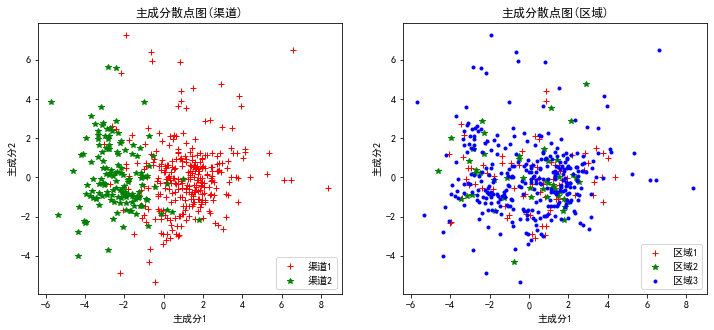

In [3]:
logX=data.iloc[:,range(2,8)].apply(lambda x:np.log(x))
pca =decomposition.PCA(n_components=2)
pca.fit(logX)
print('主成分系数',pca.components_)
Xtmp = pca.fit_transform(logX)
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(12,5))
channels=np.unique(data['Channel'])
regions=np.unique(data['Region'])
markers=['+','*','.']
colors=['r','g','b','y']
for channel in channels:
    axes[0].plot(Xtmp[data['Channel']==channel,0],Xtmp[data['Channel']==channel,1],colors[channel-1]+markers[channel-1],
                 label='渠道'+str(channel))
axes[0].set_title("主成分散点图(渠道)")
axes[0].set_xlabel("主成分1")
axes[0].set_ylabel("主成分2")
axes[0].legend(loc='lower right')
for region in regions:
    axes[1].plot(Xtmp[data['Region']==region,0],Xtmp[data['Region']==region,1],colors[region-1]+markers[region-1],
                 label='区域'+str(region))
axes[1].set_title("主成分散点图(区域)")
axes[1].set_xlabel("主成分1")
axes[1].set_ylabel("主成分2")
axes[1].legend(loc='lower right')

Text(0, 0.5, '主成分2')

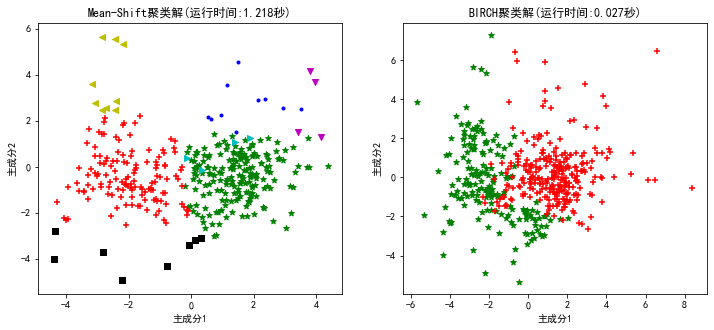

In [4]:
import time
start1 = time.clock()
#bandwidth = estimate_bandwidth(logX,quantile=0.1,random_state=1)
MS = MeanShift(bandwidth=2, bin_seeding=False) 
MS.fit(logX)
end1 = time.clock()
labels1=np.unique(MS.labels_)

start2=time.clock()
Bi=Birch(n_clusters=2)  #默认采用系统聚类
Bi.fit(logX)
end2 = time.clock()
labels2=np.unique(Bi.labels_)

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(12,5))
markers=['*','+','.','<','>','v','s']
colors=['g','r','b','y','c','m','k']
for k, col,m in zip(range(len(labels1)), colors,markers):
    axes[0].scatter(Xtmp[MS.labels_ == k, 0], Xtmp[MS.labels_ == k,1],c=col,marker=m)
axes[0].set_title("Mean-Shift聚类解(运行时间:%.3f秒)"%(end1-start1))
axes[0].set_xlabel("主成分1")
axes[0].set_ylabel("主成分2")

for k, col,m in zip(range(len(labels2)), colors,markers):
    axes[1].scatter(Xtmp[Bi.labels_ == k, 0], Xtmp[Bi.labels_ == k,1],c=col,marker=m)
axes[1].set_title("BIRCH聚类解(运行时间:%.3f秒)"%(end2-start2))
axes[1].set_xlabel("主成分1")
axes[1].set_ylabel("主成分2")


In [5]:
#import datetime
#start_time = datetime.datetime.now()  # 程序开始时间
#over_time = datetime.datetime.now()   # 程序结束时间
#total_time = (over_time-start_time).total_seconds()
#print('程序共计%s秒' % total_time)